<a href="https://colab.research.google.com/github/diegopescoalcalde/portfolio/blob/master/How_the_increase_of_killings_by_Police_officers_impacts_violence_rates_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **How the number of killings by Police officers impacts violence rates in Rio de Janeiro**
---
*by [Diego Pesco Alcalde](https://www.linkedin.com/in/diegopesco/)*

<br>

**The death of George Floyd in the United States made a strong mark in the fight against racism and human rights.** The shocking video published on the Internet showing how events happened brought people around the world to the streets to demand the end of racism and appropriate police conducts. With that in mind I decided to find more data on how Brazil relates to these topics and found this [publication](https://www.bbc.com/news/world-latin-america-51220364) from BBC, showing **a record in police killings in the state of Rio de Janeiro in 2019.** 
  
Rio de Janeiro is famous for being one of the most beautiful places of the world. Unfortunately it is also known as a really violent city, with high criminality rates and public safety issues.

<br>


![Rio de Janeiro](https://images.pexels.com/photos/161212/rio-de-janeiro-olympics-2016-niteroi-brazil-161212.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)


<br>

In BBC's article the statements of the public representatives mention that the "policy of confrontation" that was implemented by the safety agencies in the past helped to reduce homicide rates. BBC didn't seem to agree but also did not show additional data to support the statements in the article.

So I decided to look by myself to the whole violence numbers in the state of Rio de Janeiro and **see if the increase in killings by police officers reflected in an actual reduction of violent crime rate.**


## Data Collection


The dataset for the study is an official report which is publicly available on Public Safety Institute from Rio de Janeiro, that has the numbers of different crimes by month, from 1991 until 2020. I downloaded it on June 10th, 2020. I will import it as a Dataframe so we can use the information in the study.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/diegopescoalcalde/portfolio/master/violencia_estado_rj_mensal.csv", sep=';', engine='python')

## Data Pre-processing

Pre-processing data is a critical part to guarantee a fair and proper analysis. On this phase the integrity of the dataset is verified and anomalies can be identified and treated. A dataset with problems can generate errors in an automatic code or mislead conclusions when analyzed. **If you are interested in the practical results you can jump to the next section.**

To start we can check some entries of the dataset.


In [ ]:
df

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2019,12,330,8,5,124,467,410,5413,421,189,2398,368,88,3118,609,5076,1029,7,1,1830,11,116,17,1773,14043,1230,1564,584,1420,224,7199,12221,2,107,7,3645,1723,831,817,106,2055,2593,402,1132,222,4676,380,23,2,1,0,343,7935,3118,609,59808,3
348,2020,1,349,4,7,152,512,452,5374,398,134,1948,414,74,3246,577,6205,1191,1,5,2191,6,97,29,1845,15881,1365,2117,582,1740,278,8562,14644,0,98,9,3950,1720,734,877,140,2128,2856,482,1335,265,4942,400,36,1,2,0,360,9587,3246,577,65718,2
349,2020,2,323,2,10,164,499,422,5410,420,145,1899,382,61,2925,418,5696,1309,2,7,2068,4,79,12,1552,14515,1182,2133,568,2267,231,7328,13709,0,103,10,3547,1738,776,877,111,1788,2883,431,1190,243,4643,378,39,2,1,0,335,9073,2925,418,62850,2
350,2020,3,372,2,9,113,496,363,4069,367,126,1253,308,71,2450,366,4406,993,0,7,1542,5,92,18,1715,11973,1113,1210,393,1138,180,6752,10786,0,99,16,3086,1469,558,814,128,1526,2543,385,914,180,3243,272,16,0,1,0,383,6941,2450,366,49817,2


The Dataset provides the number of events of different crime types per month and per year. The register started in 1991 and the last information is about April 2020. So the results for 2020 will not be representative of the year and then we will remove it from the dataset.

In order to allow statistical and graphical methods to work properly in the later stages of the analysis it is also important to have the data in a proper format. If the data format is not matching the needs of the study some transformations might be needed.

Also, the dimension of the dataset is an important parameter to choose among different processing options. Different methods might change drastically the computational costs and results. So this information also needs to be investigated in the beginning.

The method `info` can be used to check for that information.

In [ ]:
#Dropping rows that include 2020 data
df.drop(df[df.ano == 2020].index, axis=0, inplace=True)

#Summary of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         348 non-null    int64 
 1   mes                         348 non-null    int64 
 2   hom_doloso                  348 non-null    int64 
 3   lesao_corp_morte            348 non-null    object
 4   latrocinio                  348 non-null    int64 
 5   hom_por_interv_policial     348 non-null    object
 6   letalidade_violenta         348 non-null    int64 
 7   tentat_hom                  348 non-null    int64 
 8   lesao_corp_dolosa           348 non-null    int64 
 9   estupro                     348 non-null    object
 10  hom_culposo                 348 non-null    object
 11  lesao_corp_culposa          348 non-null    object
 12  roubo_comercio              348 non-null    int64 
 13  roubo_residencia            348 non-null    int64 

Even though all variables in the dataset are numbers there are some which were imported as objects. Changing all variables to numeric types will allow mathematical operations. For that we can iterate the method `to_numeric` from pandas and use the coerce condition to proceed with the change in case a non-numeric value is found.

In [ ]:
#Change variable types to numeric
for i in df.columns:
  df[i] = pd.to_numeric(df[i], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         348 non-null    int64  
 1   mes                         348 non-null    int64  
 2   hom_doloso                  348 non-null    int64  
 3   lesao_corp_morte            252 non-null    float64
 4   latrocinio                  348 non-null    int64  
 5   hom_por_interv_policial     264 non-null    float64
 6   letalidade_violenta         348 non-null    int64  
 7   tentat_hom                  348 non-null    int64  
 8   lesao_corp_dolosa           348 non-null    int64  
 9   estupro                     204 non-null    float64
 10  hom_culposo                 264 non-null    float64
 11  lesao_corp_culposa          252 non-null    float64
 12  roubo_comercio              348 non-null    int64  
 13  roubo_residencia            348 non

The variables with type object were converted to floats, which is good enough for now.

From the summary above we observe that we also have to deal with missing values before moving on. Let's check the percentage of missing values for each variable using the method `isnull`.

In [ ]:
#Check for missing values in the dataset
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.793103
furto_bicicleta               0.793103
cmba                          0.517241
cmp                           0.517241
posse_drogas                  0.517241
trafico_drogas                0.517241
apreensao_drogas_sem_autor    0.517241
apf                           0.517241
aaapai                        0.517241
sequestro_relampago           0.413793
estelionato                   0.413793
roubo_conducao_saque          0.413793
furto_coletivo                0.413793
roubo_apos_saque              0.413793
pol_militares_mortos_serv     0.413793
pol_civis_mortos_serv         0.413793
furto_celular                 0.413793
roubo_cx_eletronico           0.413793
estupro                       0.413793
extorsao                      0.413793
pessoas_desaparecidas         0.379310
encontro_ossada               0.379310
roubo_celular                 0.310345
registro_ocorrencias          0.275862
lesao_corp_culposa            0.275862
sequestro                

The quantity of missing values is too high to remove them from the dataset. So in order to allow a proper analysis these values will have to be replaced. Replacing missing values is a common challenge in Data Science, but before considering alternatives to deal with this issue it is important to get a sense of the data distribution behaviour for these variables. I will use histograms for that.

<function matplotlib.pyplot.tight_layout>

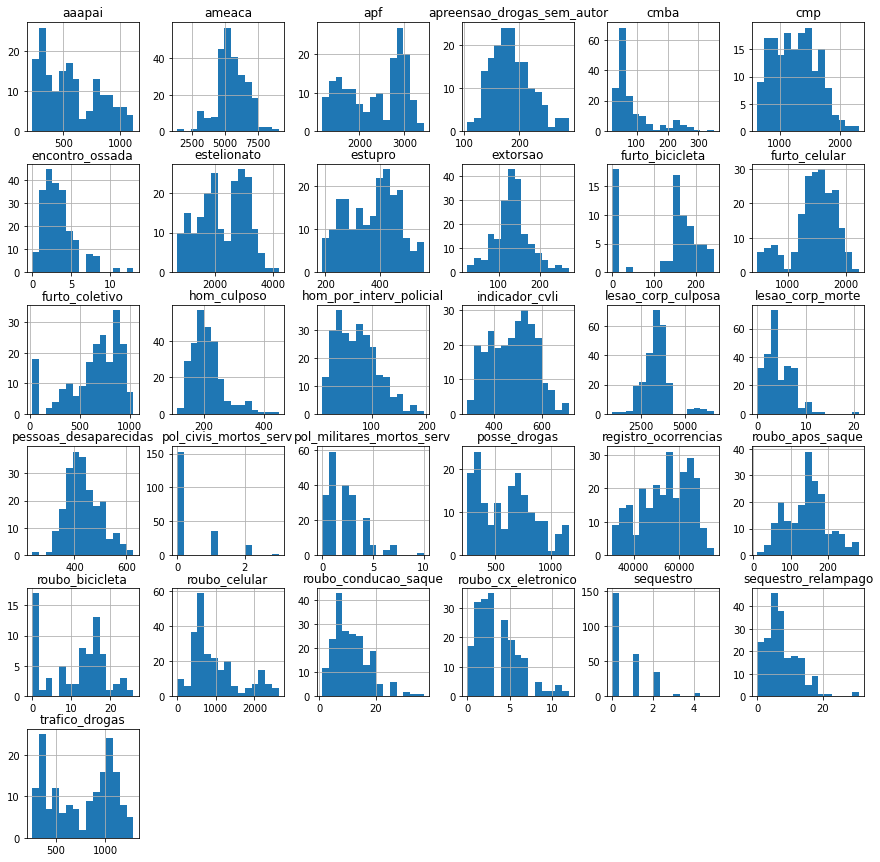

In [ ]:
#Plot histograms of variables that have missing values
df_missing = df.loc[:, (df.isnull().sum() > 0)]
df_missing.hist(bins=15, figsize=(15, 15));
plt.tight_layout

The distributions show many different patterns. For symmetrically distributed data we can use the mean as replacement for the missing values. For highly skewed data it is more appropriate to use the median. Distributions with tendencies of systematic effects have to be more deeply analyzed in case a big quantity of replacements are needed. 

Since not all variables are matter of interest in the study, let's fill only the blanks of the most relevant ones, and remove the rest from the dataset. I will keep mainly variables from the most violent crimes in the state, and present them to you before the analysis phase. 

In [ ]:
#Copy original dataset
df_clean = df.copy()

#Replace missing values by the most appropriate values
df_clean.estupro.fillna(df.estupro.mean(), inplace=True)
df_clean.sequestro_relampago.fillna(df.sequestro_relampago.mean(), inplace=True)
df_clean.sequestro.fillna(df.sequestro.median(), inplace=True)
df_clean.hom_culposo.fillna(df.hom_culposo.median(), inplace=True)
df_clean.hom_por_interv_policial.fillna(df.hom_por_interv_policial.median(), inplace=True)

#Drop other columns with missing values
df_clean.dropna(axis=1, inplace=True)

#Recheck dataset
df_clean.isnull().sum()

ano                        0
mes                        0
hom_doloso                 0
latrocinio                 0
hom_por_interv_policial    0
letalidade_violenta        0
tentat_hom                 0
lesao_corp_dolosa          0
estupro                    0
hom_culposo                0
roubo_comercio             0
roubo_residencia           0
roubo_veiculo              0
roubo_carga                0
roubo_transeunte           0
roubo_em_coletivo          0
roubo_banco                0
outros_roubos              0
total_roubos               0
furto_veiculos             0
furto_transeunte           0
outros_furtos              0
total_furtos               0
sequestro                  0
sequestro_relampago        0
apreensao_drogas           0
recuperacao_veiculos       0
encontro_cadaver           0
indicador_roubo_rua        0
indicador_roubo_veic       0
indicador_roubo_carga      0
fase                       0
dtype: int64

No missing values are present in the dataset anymore, so the last step is to convert all data types to integers to avoid any issue during the mathematical operations.

In [ ]:
#Change variable type to integer
df_clean = df_clean.astype('int64')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ano                      348 non-null    int64
 1   mes                      348 non-null    int64
 2   hom_doloso               348 non-null    int64
 3   latrocinio               348 non-null    int64
 4   hom_por_interv_policial  348 non-null    int64
 5   letalidade_violenta      348 non-null    int64
 6   tentat_hom               348 non-null    int64
 7   lesao_corp_dolosa        348 non-null    int64
 8   estupro                  348 non-null    int64
 9   hom_culposo              348 non-null    int64
 10  roubo_comercio           348 non-null    int64
 11  roubo_residencia         348 non-null    int64
 12  roubo_veiculo            348 non-null    int64
 13  roubo_carga              348 non-null    int64
 14  roubo_transeunte         348 non-null    int64
 15  roubo_

Now the dataset has no missing values and the data is in the appropriate format for the study.

## Practical Analysis 

With a clean dataset it is time to start the analysis. 
Since a lot of information is available, we will **focus the study in more violent crimes** that need a closer look from the authorities: rape, kidnapping and civilian deaths in any criminal situation.

* `pol_kil` is the number of people killed by police actions.
* `rape` is the official number of victims of rape
* `kidnap` is the total kidnapping cases in a especific period
* `deaths` is the number of civilians who lost their lives in criminal situations. This is a sum of all the columns of the dataset that involve civilian death.
* `ano` and `mes` are respectively the year and month in which the cases happened.


A good start is to look at a basic statistic summary of the data, and see if there are strange numbers. This initial check helps to find outliers and anomalies, and to avoid misinterpretation of the results. The method `describe` is an excellent alternative for that.


In [ ]:
#Create new dataset and create a datetime column including year and month
df_violent = pd.DataFrame(df_clean[['ano', 'mes']])
df_violent['date'] = df_violent['ano'].map(str) + '-' + df_violent['mes'].map(str)
df_violent['date'] =  pd.to_datetime(df_violent['date'], format="%Y-%m")

#Add the variables that we want to study to the dataset
df_violent['rape'] = df_clean['estupro']
df_violent['pol_kil'] = df_clean['hom_por_interv_policial']
df_violent['kidnap'] = df_clean.sequestro + df_clean.sequestro_relampago

#Sum all cases of crimes that involve civilian deaths
df_violent['deaths'] = df_clean.latrocinio + df_clean.hom_culposo + df_clean.hom_doloso + df_clean.hom_por_interv_policial

#Check the dataset
df_violent.describe()

,ano,mes,rape,pol_kil,kidnap,deaths
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2005.000000,6.500000,371.468391,72.238506,7.931034,799.882184
std,8.378647,3.457023,72.355762,32.438423,3.915662,133.141516
min,1991.000000,1.000000,188.000000,10.000000,0.000000,472.000000
25%,1998.000000,3.750000,359.000000,49.750000,7.000000,692.000000
50%,2005.000000,6.500000,371.000000,70.000000,7.000000,821.500000
75%,2012.000000,9.250000,404.000000,88.000000,9.000000,894.000000
max,2019.000000,12.000000,561.000000,195.000000,32.000000,1121.000000


Despite the high numbers, no strange values were identified. The histograms plotted in the pre-processing phase are also very helpful in that verification.

The main objective of the study is to understand if the numbers of violent crimes are increasing or decreasing, and how they relate with the rate of causalities by the police officers. Tendency of data per month can be plotted for that.

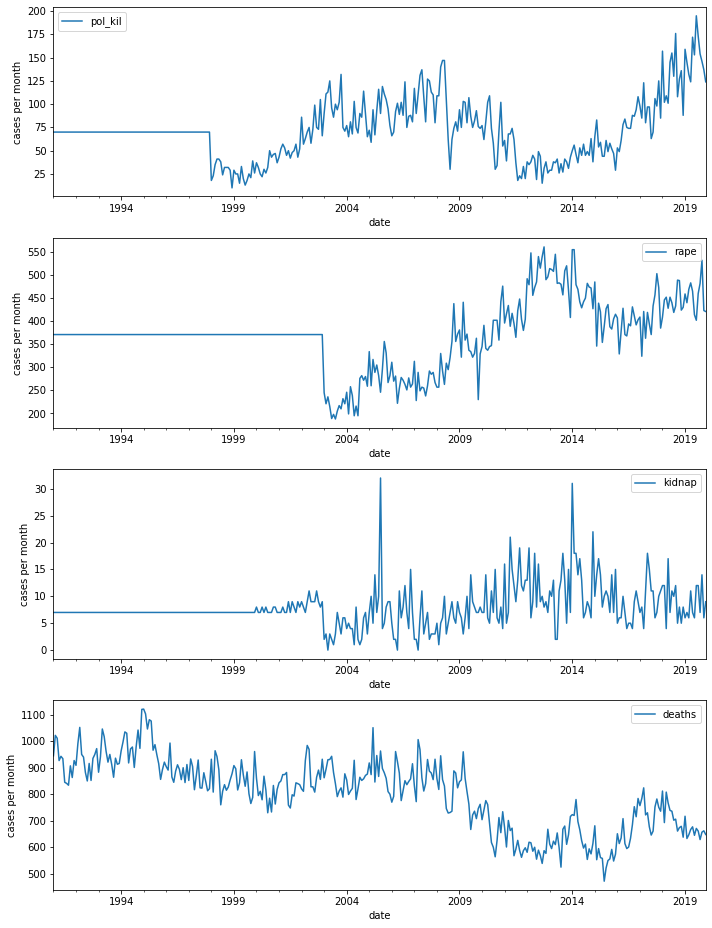

In [ ]:
#Plot time series of the variables
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,13))
df_violent.plot(x='date', y='pol_kil', ax=ax1)
df_violent.plot(x='date', y='rape', ax=ax2)
df_violent.plot(x='date', y='kidnap', ax=ax3)
df_violent.plot(x='date', y='deaths', ax=ax4)
ax1.set_ylabel('cases per month')
ax2.set_ylabel('cases per month')
ax3.set_ylabel('cases per month')
ax4.set_ylabel('cases per month')
plt.tight_layout()
plt.show()

The straight lines in the beginning of some charts is because data was not collected during those years and the missing values were replaced by the mean or the median. So those dates cannot be used for the study.

It is possible to get some information from the time series of these variables.

* Police Killings - As reported by BBC, the number of civilian deaths in police actions is increasing significantly. **It is the highest number since this data started to be recorded in 1991.**

* Rape - The official monthly cases of rape in the state more than doubled from 2003 until 2019. Is the number of actual rapes increasing? Or more victims started reporting the cases and pressing charges during the years? The results can be interpreted in many ways and the conclusions are totally different, so critical thinking is fundamental and additional data has to be raised to support any new theory. **With the available information it is not possible to state that cases of rape are reducing with time.** Instead, public agencies should check more data and if the crime rate is indeed rising they need to act on the root causes.

* Kidnapping - The cases are also on an ascending trend, but we can see a spikes in the graph showing that the month to month variation is big when compared to the mean behaviour.

* Deaths - The number of dead people during criminal situations reduced significantly from 2007 to 2013. Then it oscillated and from 2016 it started rising back again. If we look at the time series for Rape, 2016 is also the year when the trend changed. 

Interested on that I did a quick search on the Internet about public safety in Rio de Janeiro in 2016, and remembered an important fact: **That was the year of the Olympic Games in the city.** Many publications such as [this one](https://www.reuters.com/article/us-brazil-olympics-one-year/a-year-after-olympics-brazils-army-called-to-quell-violence-in-rio-idUSKBN1AK27P) in Reuters discuss how badly the investments were done in safety measures, and that **they were just enough to hide the violence during the games.** Once the games ended, the resources were significantly reduced, and with that the violent crimes came back again.

But the deaths were reducing since 2007, so the investment for the Olympics is only part of the story. What is interesting is that **from 2007 until 2013 the death rates on violent crimes reduced with a reduction of police killings.** A more detailed investigation in the history of safety policies from 2007 until 2013 can help to develop new ideas and improve the fight against crime.

Now letting the month to month variation aside the long term trends per year can be better visualized. I will plot a graph of total cases per year of each variable in the study.



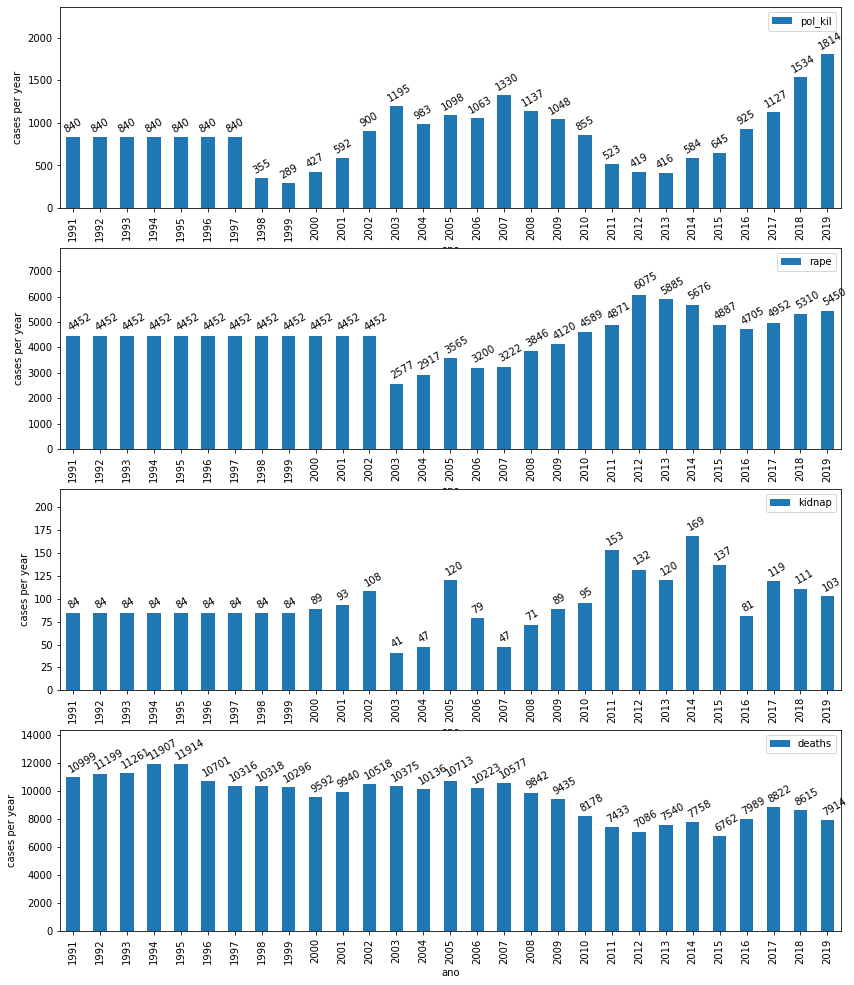

In [ ]:
#Create dataset of cases by year
df_ano = df_violent.groupby('ano').sum()

#Plot time series by year
figu, (ax5, ax6, ax7, ax8)= plt.subplots (4, 1, figsize=(14, 17))
df_ano.plot.bar(y='pol_kil', ax=ax5)
df_ano.plot.bar(y='rape', ax=ax6)
df_ano.plot.bar(y='kidnap', ax=ax7)
df_ano.plot.bar(y='deaths', ax=ax8)

for i, v in enumerate(df_ano.pol_kil):
  ax5.text(i-0.4, v+50, str(v), rotation=30, color='black')
ax5.margins(0.3, y=max(df_ano.pol_kil))

for i, v in enumerate(df_ano.rape):
  ax6.text(i-0.25, v+200, str(v), rotation=30, color='black')
ax6.margins(0.3, y=max(df_ano.rape))

for i, v in enumerate(df_ano.kidnap):
  ax7.text(i-0.25, v+5, str(v), rotation=30, color='black')
ax7.margins(0.3, y=max(df_ano.kidnap))

for i, v in enumerate(df_ano.deaths):
  ax8.text(i-0.25, v+300, str(v), rotation=30, color='black')
ax8.margins(0.2, y=max(df_ano.deaths))

ax5.set_ylabel('cases per year')
ax6.set_ylabel('cases per year')
ax7.set_ylabel('cases per year')
ax8.set_ylabel('cases per year')
plt.tight_layout
plt.show()

The numbers are shocking. Among victims of rape, kidnapping and murders there are more than 10000 people impacted directly by the violence in Rio de Janeiro every year. **Daily that represents more than 27 people going through events that will end their life or change it severely in a single state of Brazil.** That doesn't include robberies, injuries and the psychological impacts that this situation also brings along. I will not dive into comparisons of deaths per total population, there are many good studies showing that. But it is impossible not to feel deeply sad about this reality.

In the first chart we can also see the increase in people killed in police actions from 416 in 2013 to 1814 in 2019. It increased to 4.36 times in 6 years. **However the trends of violent crimes are not descendent within this timeframe.** The results in 2019 are pretty much the same ones achieved in 2013.

## Correlation among Data

Correlation is an important flag on the path to generate and validate some theories. It is a value that reaches from -1 to 1 and is a measurement of how a change in one variable impacts another variable. Correlations close to 0 means that the variables do not correlate, and values close to -1 or 1 indicate strong correlation, i.e. when one variable changes the other one also changes.

If there is a strong correlation among data it should be investigated more deeply to understand if there is a cause-consequence relation as well. But in the absence of correlation, there are few chances that these two variables are indeed directly connected.

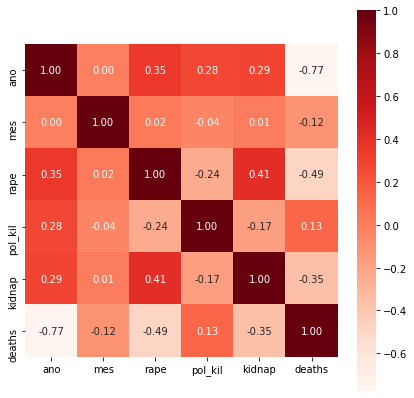

In [ ]:
#Create correlation matrix and plot in a heatmap
corr = df_violent.corr()
fig3, ax9 = plt.subplots(1, 1, figsize=(7,7))
sns.heatmap(corr, cmap='Reds', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax9);

The strongest correlation in the table is among deaths and years, which is a sign that the total deaths in criminal events are reducing with time. But this correlation is an analysis involving the entire dataset, from 1991 until 2019, so this has no strict relationship with the last couple years. **When we look at police killings, there are no signs of strong correlation with any of the changes in crime rates.** That means that even if we see more police killings in the next years that does not necessarily mean a progress towards violence reduction in the state.

## Forecast of the Time Series

Now let's see if we are able to use the current dataset to make predictions. For that we have to check for **stationarity**, which in a time series means showing constant behaviors in the mean, variance and covariance. I will copy the original dataset for this study and drop the values prior to 1998, because there is no actual data from that time regarding police killing and the mean values will impact the model prediction.

In [ ]:
#Exclude rows
df_forecast = df_violent.copy().drop(df_violent[df_violent.ano < 1998].index, axis=0)
df_forecast.set_index('date', inplace=True)

df_forecast

,ano,mes,rape,pol_kil,kidnap,deaths
date,,,,,,
1998-01-01,1998,1,371,18,7,932
1998-02-01,1998,2,371,23,7,808
1998-03-01,1998,3,371,35,7,964
1998-04-01,1998,4,371,41,7,942
1998-05-01,1998,5,371,41,7,892
...,...,...,...,...,...,...
2019-08-01,2019,8,460,173,12,661
2019-09-01,2019,9,482,154,7,629
2019-10-01,2019,10,532,146,14,657


The first variable to be analyzed is the number of people killed by the police. To check for stationarity the ADF test can be used. The p-value will indicate the probability of an existing Unit Root, which is a common sign of non-stationary time series. So the lower the p-value, the better.

In [ ]:
# Run ADF test in the variable of Police Killings and print results

X = df_forecast.pol_kil.values

result = adfuller(X)
print('Augmented Dickey-Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('p-value: {:.4f}'.format(result[1]))
print('Critical values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey-Fuller
Statistical Test: -1.1258
p-value: 0.7047
Critical values:
	1%: -3.4569
	5%: -2.8732
	10%: -2.5730


The results show that it is probably not stationary, so the forecast model cannot be applied in this condition. It is possible to do some transformations with the data and see if we can find a stationary series within these transformations.

The first step is to take the log of the values. Usually the difference among the logs of numbers are smaller than the difference among the numbers themselves, by the mathematical definition of log.

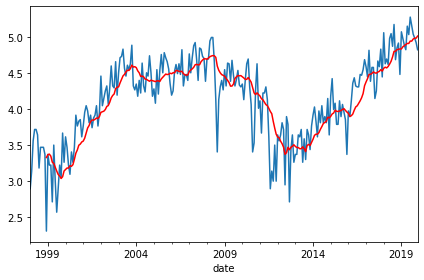

In [ ]:
#Calculate the log of pol_kil

df_log = np.log(df_forecast.pol_kil)

#Calculate the moving average of the results

ma_log = df_log.rolling(12).mean()

#Plot the log and moving average

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()


Then to reduce even more the differences, the moving average can be subtracted from all values. This will push the data to values close to zero and remove the trends from the series.

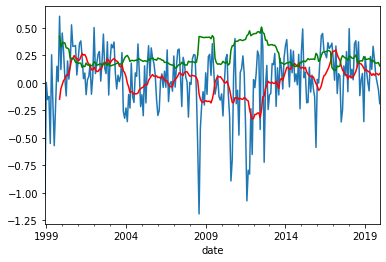

In [ ]:
#Subtract the moving average of the result of each row

df_sub = (df_log - ma_log).dropna()

#Calculate the moving average and standard deviation of the new variable

ma_sub = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

#Plot the curves

fig, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color='r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show()

Now we can repeat the ADF test for stationarity.

In [ ]:
#Repeat ADF analysis
X_sub = df_sub.values

result_sub = adfuller(X_sub)
print('Augmented Dickey-Fuller')
print('Statistical Test: {:.4f}'.format(result_sub[0]))
print('p-value: {:.10f}'.format(result_sub[1]))
print('Critical values:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey-Fuller
Statistical Test: -3.2695
p-value: 0.0162984258
Critical values:
	1%: -3.4581
	5%: -2.8738
	10%: -2.5733


The p-value has reduced, but we will go one step further and use differentiation to make the series even more stationary. Differentiation is an operation of subtraction of one value by the value immediately before it.

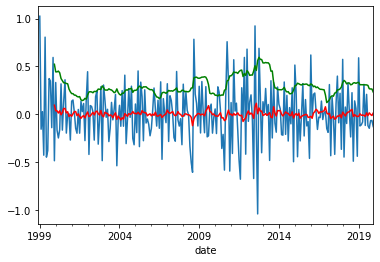

Augmented Dickey-Fuller
Statistical Test: -6.0016
p-value: 0.0000001652
Critical Value:
	1%: -3.4582
	5%: -2.8738
	10%: -2.5733


In [ ]:
#Apply differentiation, calculate moving average and standard deviation
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

#Plot curves
fig, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.show()

#Extract the numbers
X_diff = df_diff.dropna().values


#Repeat ADF
result_diff = adfuller(X_diff)
print('Augmented Dickey-Fuller')
print('Statistical Test: {:.4f}'.format(result_diff[0]))
print('p-value: {:.10f}'.format(result_diff[1]))
print('Critical Value:')
for key, value in result_diff[4].items():
	print('\t{}: {:.4f}'.format(key, value))

There was a considerable additional improvement with differentiation. The steps of subtracting the moving average and differentiation are techniques of a forecast model called ARIMA (Autoregressive Integrated Moving Average). Since we have seen that it will generate a stationary time series, we can use this model to predict the number of deaths by police agents for the next months.

The model has three parameters that have to be tuned to predict well the results: p, d, q. A good reference for q and p can be found in the charts of Autocorrelation and Partial Autocorrelation, respectively. The initial guess for these parameters is the number of terms after which the charts cross the superior confidence interval.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


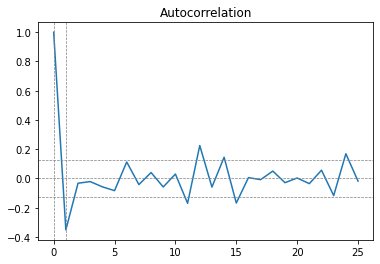

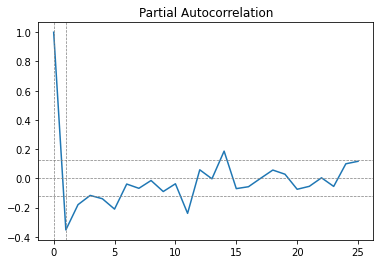

In [ ]:
#Calculate Autocorrelation (ACF) and Partial Autocorrelation (PACF)


lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

#Plot the charts of ACF and PACF
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axvline(x=1, linestyle='--', color='gray', linewidth=0.7)
plt.axvline(x=0, linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelation")
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axvline(x=1, linestyle='--', color='gray', linewidth=0.7)
plt.axvline(x=0, linestyle='--', color='gray', linewidth=0.7)
plt.title("Partial Autocorrelation")
plt.show()

Since the charts cross the superior confidence interval before the 1st term, we will tune the model using the values of 1 to see how it will perform. To check the quality of the model, the data after 2017 will be used as test set, and the model will be trained with data until 2017.

In [ ]:
#Repeating the definition of df_forecast to allow changes in the years of the analysis
df_forecast = df_violent.copy().drop(df_violent[df_violent.ano < 1998].index, axis=0)
df_forecast.set_index('date', inplace=True)

#Define train and test sets
df_forecast_train = df_forecast[df_forecast.ano <= 2017]
df_forecast_test = df_forecast[df_forecast.ano > 2017]

#Create log series from the train set
train_log = np.log(df_forecast_train.pol_kil)

#train ARIMA model
model = ARIMA(train_log, order=(1,1,1))
result_AR = model.fit(disp = -1)

#Print summary of results
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.pol_kil   No. Observations:                  239
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -37.739
Method:                       css-mle   S.D. of innovations              0.283
Date:                Thu, 18 Jun 2020   AIC                             83.477
Time:                        12:10:38   BIC                             97.383
Sample:                    02-01-1998   HQIC                            89.081
                         - 12-01-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0054      0.006      0.966      0.335      -0.006       0.016
ar.L1.D.pol_kil     0.2740      0.091      3.012      0.003       0.096       0.452
ma.L1.D.pol_kil    -0.7796      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


The summary of prediction show that the terms are indeed significant, with small p-values. Let's check the residuals distribution.

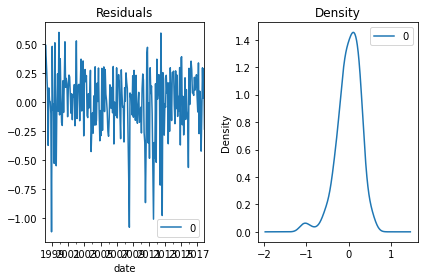

In [ ]:
#Plot regression residuals
residuals = pd.DataFrame(result_AR.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()

Residuals are centered with a couple disturbances. It is not a perfect result but it is not bad either. To understand visually how good are the predictions of the model we can plot the train and test sets along with the values predicted. This can be repeated for different train and test sets to understand the quality of the model.

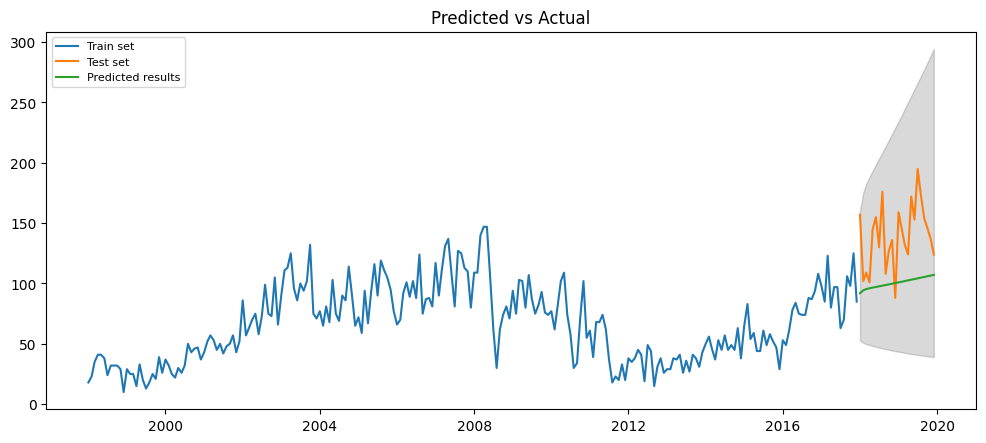

In [ ]:
#Forecast values and confidence intervals
fc, se, conf = result_AR.forecast(24, alpha=0.05)  # 95% conf

#Changing back the result from log to the real value
fc_real = np.exp(fc)
conf_real = np.exp(conf)

#Create series of forecast and confidence intervals
fc_series = pd.Series(fc_real, index=df_forecast_test.index)
lower_series = pd.Series(conf_real[:, 0], index=df_forecast_test.index)
upper_series = pd.Series(conf_real[:, 1], index=df_forecast_test.index)

#Plot chart with train, test and forecast sets
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_forecast_train.pol_kil, label='Train set')
plt.plot(df_forecast_test.pol_kil, label='Test set')
plt.plot(fc_series, label='Predicted results')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predicted vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The forecast does not seem very good. The use of all historical data seems to be holding the predicted values below the real cases. This makes sense because the model does not know that there was a "policy of confrontation" implemented in police actions after 2012.

Below I will repeat the analysis fitting the data from 2013 onwards, when these new "guidelines" started to be applied.

In [ ]:
#Repeating the definition of df_forecast to allow changes in the years of the analysis
df_forecast = df_violent.copy().drop(df_violent[df_violent.ano < 2013].index, axis=0)
df_forecast.set_index('date', inplace=True)

# Define train and test sets
df_forecast_train = df_forecast[df_forecast.ano <= 2017]
df_forecast_test = df_forecast[df_forecast.ano > 2017]
df_forecast_test

# train ARIMA
from statsmodels.tsa.arima_model import ARIMA
train_log = np.log(df_forecast_train.pol_kil)
model = ARIMA(train_log, order=(1,1,1))
result_AR = model.fit(disp = -1)


print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.pol_kil   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   6.736
Method:                       css-mle   S.D. of innovations              0.209
Date:                Thu, 18 Jun 2020   AIC                             -5.471
Time:                        12:13:54   BIC                              2.839
Sample:                    02-01-2013   HQIC                            -2.227
                         - 12-01-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0196      0.002      9.500      0.000       0.016       0.024
ar.L1.D.pol_kil     0.2557      0.128      1.997      0.051       0.005       0.507
ma.L1.D.pol_kil    -1.0000      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


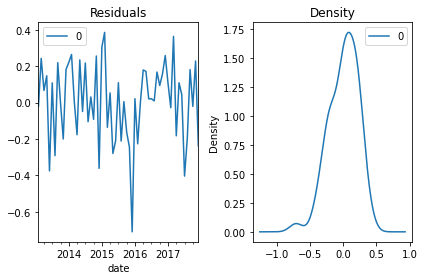

In [ ]:
residuals = pd.DataFrame(result_AR.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()

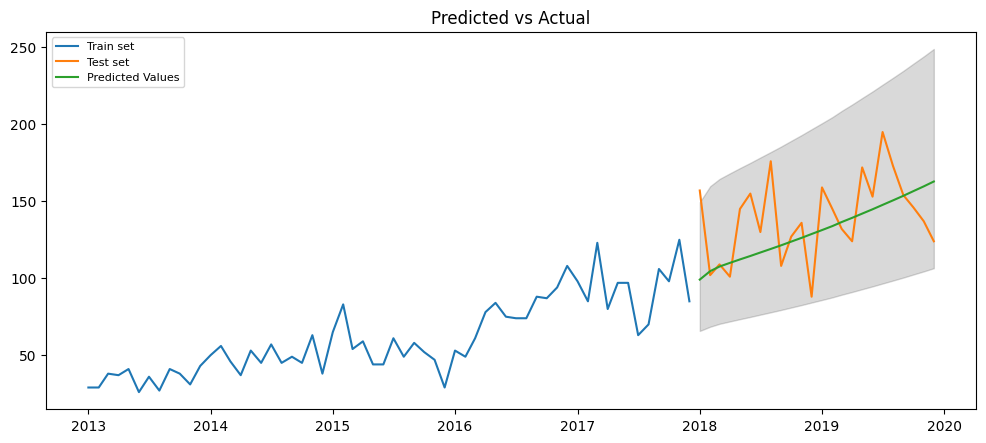

In [ ]:

#Forecast values and confidence intervals
fc, se, conf = result_AR.forecast(24, alpha=0.05)  # 95% conf

#Changing back the result from log to the real value
fc_real = np.exp(fc)
conf_real = np.exp(conf)

#Create series of forecast and confidence intervals
fc_series = pd.Series(fc_real, index=df_forecast_test.index)
lower_series = pd.Series(conf_real[:, 0], index=df_forecast_test.index)
upper_series = pd.Series(conf_real[:, 1], index=df_forecast_test.index)

#Plot chart with train, test and forecast sets
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_forecast_train.pol_kil, label='Train set')
plt.plot(df_forecast_test.pol_kil, label='Test set')
plt.plot(fc_series, label='Predicted Values')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predicted vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The model seems to predict better the results, and does not show signs of slope change for the next years. That means that, if no significant action is taken to change the way public safety is done in Rio de Janeiro, probably more and more people will be killed in the next years.

## Conclusion

The objective of the study was to understand if the "policy of confrontation" being implemented in the state of Rio de Janeiro in the last years is helping in crime rate reduction. After a brief analysis the numbers of violent crimes in the state of Rio de Janeiro we can come up with a couple questions and conclusions:

* **Police killings in confrontation with suspects has increased by more than 4 times in 6 years.** It is not a random variation so it is probably consequence of different safety procedures or actions.
* The number of official rape cases is increasing, but **more data is needed before concluding that this is an increase in the actual violence.** Subnotification is known as an issue in this type of crime and the results can also mean that more victims are coming forward and reporting the cases. However, the data must not be ignored and safety agencies must act to make sure that rape rates do not increase.
* The kidnapping cases fluctuate a lot over the months and years, so it is not possible to attribute the recent reductions to any cause with the data available. **More information is needed in order to make sure that it is not a common cause variation.**
* The death of civilians in criminal situations has a reduction trend if we analyze the entire dataset since 1991. However there is **no sign of reduction trend since 2013, when the police killings started to increase.** There is also no strong correlation between the number of people killed by the police and the cases of rape, kidnapping and deaths in criminal situations.

* The best hypotesis is that both crime rates and police killings are dependent variables of other factors such as the quantity of police officers on the street, the number of confrontations with criminals and the quantity of major police actions in critical regions. However it is important to remember again that from 2007 until 2012 the death rates reduced consistently, with also a consistent drop of police killing events, so **there are better alternatives to this problem than the use of brute force.**
* Running a time series forecast analysis we can see that **the number of people killed by the police is expected to rise in the next years.** Surely 2020 will be an exception, because of COVID-19 quarantines, but real actions need to be taken to make sure that the numbers do not come back up. The protests after George Floyd's death can be the trigger to new discussions and new ideas on how to better tackle the issue of violence in Rio de Janeiro.


The public safety problem involves hundreds of variables and solutions involve huge efforts not only from public safety agencies but from the government as a whole. The purpose of this analysis is to extend the discussion from BBC's article with some additional data, and maybe raise new theories that can be further investigated in our path to a more equal and peaceful society. There are many other analysis that can be done using the datasets available, so I encourage people and organizations to do that and bring relevant information to people. In a generation where a single person can shout personal opinions to thousands of people I really believe **we must look beneath the surface and rely on data to solve problems of our society.**